In [1]:
import Su22
import qiskit as qk
import numpy as np
from qiskit.tools.visualization import plot_histogram
from qiskit import IBMQ
from qiskit.tools.monitor import job_monitor
from qiskit.providers.aer.noise import NoiseModel
import matplotlib
import matplotlib.pyplot as plt
from qiskit.visualization import plot_bloch_multivector
from qiskit.tools.monitor import job_monitor
from qiskit import pulse              
from qiskit.circuit import Parameter 
from IPython.display import display
from qiskit import QuantumCircuit
from qiskit.circuit import Gate
import warnings
warnings.filterwarnings('ignore')
from qiskit.tools.jupyter import *
# The pulse simulator
from qiskit.providers.aer import PulseSimulator

# Object for representing physical models
from qiskit.providers.aer.pulse import PulseSystemModel
token = '792003cde0750f1452faa5cb5fe7c57da849e1119983f608e9a359d49cdb396391d6af09eedfb46af0a043a01103ed64da66835d1a318c0013d64ab3ebc1fe61'

qk.IBMQ.save_account(token=token)
qk.IBMQ.enable_account(token)
print(IBMQ.providers())
provider = IBMQ.get_provider(hub="ibm-q", group="open", project="main")
backend = provider.get_backend("ibmq_armonk")


configrc.store_credentials:WARNING:2022-06-26 16:28:25,289: Credentials already present. Set overwrite=True to overwrite.


[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>, <AccountProvider for IBMQ(hub='ibm-q-ornl', group='ornl', project='phy147')>]


In [ ]:
test= [np.cos(x) for x in range(64)]
signal = Su22.Custom_Fgp('low_freq',test,backend)
temp = signal.Customize_pulse(1)
with pulse.build(backend=backend) as pulse_2:
    #pulse.play(pulse.Gaussian(duration=1000,amp=1,sigma=1000, name='Rabi Pulse'), pulse.drive_channel(0))
    pulse.call(temp,pulse.drive_channel(0))
print(signal.input)
print(signal.norm)
signal.draw()

Job Status: job is queued (4)     

In [ ]:
circ = QuantumCircuit(7,1)
circ.x([0])
circ.h([0,3,5])
circ.cx(0,1)
circ = signal.add_as_gate(circ,[0,1,2])
circ.draw('mpl')

In [4]:
from scipy.optimize import curve_fit

def fit_function(x_values, y_values, function, init_params):
    fitparams, conv = curve_fit(function, x_values, y_values, init_params)
    y_fit = function(x_values, *fitparams)
    return fitparams, y_fit

In [5]:
from qiskit.compiler import assemble
drive_amps_2,rabi_values_2 = signal.rabi_test_Sim(50)

NameError: name 'assemble' is not defined

In [ ]:
fit_params_2, y_fit_2 = fit_function(drive_amps_2,
                                 rabi_values_2, 
                                 lambda x, A, B, drive_period, phi: (A*np.cos(2*np.pi*x/drive_period - phi) + B),
                                 [-8, 1, 2, 0])

plt.scatter(drive_amps_2, rabi_values_2, color='black')
plt.plot(drive_amps_2, y_fit_2, color='red')
print(fit_params_2)
drive_period_2 = fit_params_2[2] # get period of rabi oscillation

plt.axvline(0, color='red', linestyle='--')
plt.axvline(drive_period_2/2, color='red', linestyle='--')
plt.annotate("", xy=(0, 0), xytext=(drive_period_2/2,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(drive_period_2/2-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.show()

In [ ]:
drive_amps,rabi_values = signal.rabi_test_2(20)

In [ ]:
fit_params, y_fit = fit_function(drive_amps,
                                 rabi_values, 
                                 lambda x, A, B, drive_period, phi: (A*np.cos(2*np.pi*x/drive_period - phi) + B),
                                 [-0.02, 0, 2, 0])

plt.scatter(drive_amps, rabi_values, color='black')
plt.plot(drive_amps, y_fit, color='red')
print(fit_params)
drive_period = fit_params[2] # get period of rabi oscillation

plt.axvline(0, color='red', linestyle='--')
plt.axvline(drive_period/2, color='red', linestyle='--')
plt.annotate("", xy=(0, 0), xytext=(drive_period/2,0), arrowprops=dict(arrowstyle="<->", color='red'))
plt.annotate("$\pi$", xy=(drive_period/2-0.03, 0.1), color='red')

plt.xlabel("Drive amp [a.u.]", fontsize=15)
plt.ylabel("Measured signal [a.u.]", fontsize=15)
plt.show()

In [6]:
import qiskit
from qiskit_experiments.framework import ParallelExperiment
from qiskit_experiments.library import StateTomography

# For simulation
from qiskit.providers.aer import AerSimulator
from qiskit.test.mock import FakeArmonk

# Noisy simulator backend
backend_2 = AerSimulator.from_backend(FakeArmonk())
nq = 1
qc_ghz = qiskit.QuantumCircuit(nq)
signal.add_as_gate(circ,[0])


# QST Experiment
qstexp1 = StateTomography(qc_ghz)
qstdata1 = qstexp1.run(backend_2, seed_simulation=100).block_for_results()

# Print results
for result in qstdata1.analysis_results():
    print(result)


DbAnalysisResultV1
- name: state
- value: DensityMatrix([[ 0.9765625 +0.j        , -0.01269531-0.00683594j],
               [-0.01269531+0.00683594j,  0.0234375 +0.j        ]],
              dims=(2,))
- extra: <5 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: state_fidelity
- value: 0.9765625
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: positive
- value: True
- device_components: ['Q0']
- verified: False


In [21]:
import pickle

def loadData(inp):
    # for reading also binary mode is important
    dbfile = open(inp, 'rb')     
    db = pickle.load(dbfile)
    counter = 0
    temp = [] 
    for key in db:
        temp.append(key)
    print(counter)
    dbfile.close()
    return temp

data=loadData('FGRAFS_controls_N128.p')
print(type(data))

0
<class 'list'>


Omkar => {'key': 'Omkar', 'name': 'Omkar Pathak', 'age': 21, 'pay': 40000}
Jagdish => {'key': 'Jagdish', 'name': 'Jagdish Pathak', 'age': 50, 'pay': 50000}


[-0.16667963 -0.36391907 -0.65355124 -1.04534695 -1.54096819 -2.13161027
 -2.79632331 -3.50132882 -4.20057732 -4.8376848  -5.34924722 -5.66937735
 -5.73515271 -5.49252667 -4.9021544  -3.94453618 -2.62389337 -0.97027098
  0.9604986   3.08914428  5.31756577  7.53541667  9.62815366 11.48586436
 13.01207012 14.13166224 14.79718088 14.99278231 14.73545202 14.07328786
 13.08097204 11.85284123 10.49421915  9.11186556  7.80449763  6.6543403
  5.7205594   5.03523376  4.60225171  4.39920091  4.38199477  4.49167882
  4.66262185  4.83114622  4.94360754  4.96300246  4.87335616  4.68140117
  4.41537428  4.1210954   3.85580922  3.6805332   3.65183115  3.81400063
  4.19261546  4.79020779  5.58462461  6.5302808   7.56219148  8.60233948
  9.56765922 10.37872641 10.96815826 11.28776031 11.31359999 11.04842708
 10.52116874  9.78356583  8.90434751  7.96162481  7.03438655  6.19408061
  5.49724718  4.98004214  4.65526252  4.51218958  4.51923303  4.62903213
  4.78538263  4.93114779  5.01619969  5.00443678  4.

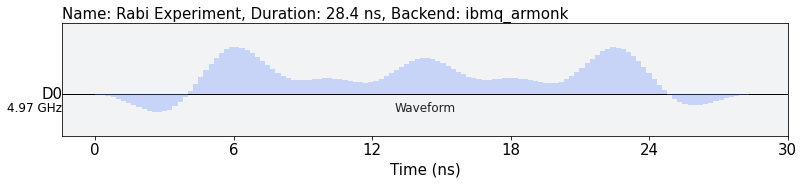

In [23]:
signal = Su22.Custom_Fgp('low_freq',data,backend)
temp = signal.Customize_pulse(1)
with pulse.build(backend=backend) as pulse_2:
    #pulse.play(pulse.Gaussian(duration=1000,amp=1,sigma=1000, name='Rabi Pulse'), pulse.drive_channel(0))
    pulse.call(temp,pulse.drive_channel(0))
print(signal.input)
print(signal.norm)
signal.draw()

In [124]:
storc = [8]
stnaoh = [0.1,0.15,0.2,0.25,0.3]
volume = 3
vol = 3
inc = 5
inc_vol = 0.5
tx = []
ty =[]
x_vals= []
y_vals = []
names=[]
for orc in storc:   
    for oh in stnaoh:
            temporc= orc
            tempoh=oh
            for i in range(inc+1):
                x_vals.append(tempoh)
                y_vals.append(temporc)
                temporc = temporc * (vol/(vol+inc_vol))
                tempoh = (tempoh*vol)/(vol+inc_vol)
                vol+=inc_vol
            vol = volume
            tx.append(x_vals)
            ty.append(y_vals)
            x_vals= []
            y_vals = []
            tempstr = str(orc) + "% orc + " + str(oh) + "N NaOH" 
            names.append(tempstr)
print(ty)

[[8, 6.857142857142857, 6.0, 5.333333333333333, 4.8, 4.363636363636363], [8, 6.857142857142857, 6.0, 5.333333333333333, 4.8, 4.363636363636363], [8, 6.857142857142857, 6.0, 5.333333333333333, 4.8, 4.363636363636363], [8, 6.857142857142857, 6.0, 5.333333333333333, 4.8, 4.363636363636363], [8, 6.857142857142857, 6.0, 5.333333333333333, 4.8, 4.363636363636363]]


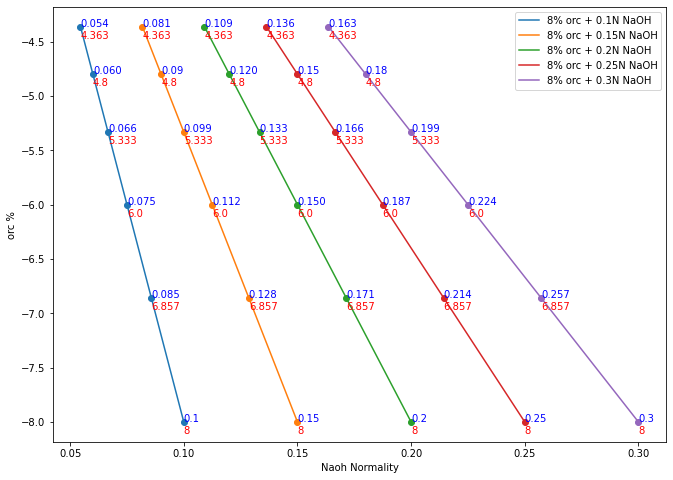

In [129]:
plt.figure(figsize=(11,8))
for i in range(len(tx)):
    plt.scatter(tx[i], -1*np.array(ty[i]))
    plt.plot(tx[i], -1*np.array(ty[i]),label=names[i])
plt.ylabel("orc %")
plt.xlabel("Naoh Normality")
plt.legend()
counter = 0
for j in tx:
    for i,label in enumerate(j):
        plt.annotate(str(label)[0:5], (tx[counter][i], -1*ty[counter][i]), color="blue")
        plt.annotate(str(ty[counter][i])[0:5], (tx[counter][i], -1*ty[counter][i]-0.11), color="red")
    counter+=1
plt.savefig("output.png")
plt.show()